MovieWriter imagemagick unavailable; using Pillow instead.


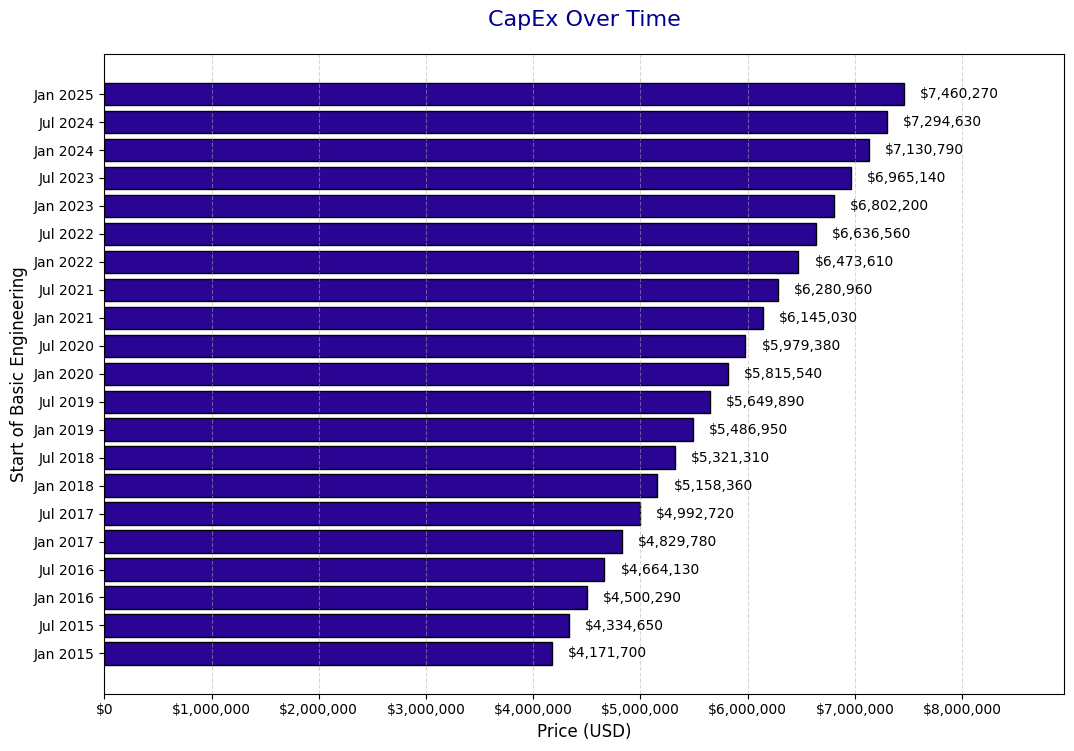

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation
import pandas as pd

# Data (unchanged)
data = {
    "Date": [
        "01-01-2015", "01-07-2015", "01-01-2016", "01-07-2016", "01-01-2017",
        "01-07-2017", "01-01-2018", "01-07-2018", "01-01-2019", "01-07-2019",
        "01-01-2020", "01-07-2020", "01-01-2021", "01-07-2021", "01-01-2022",
        "01-07-2022", "01-01-2023", "01-07-2023", "01-01-2024", "01-07-2024",
        "01-01-2025"
    ],
    "Price (USD)": [
        4171700, 4334650, 4500290, 4664130, 4829780, 4992720, 5158360, 5321310,
        5486950, 5649890, 5815540, 5979380, 6145030, 6280960, 6473610,
        6636560, 6802200, 6965140, 7130790, 7294630, 7460270
    ]
}

# Convert to DataFrame and preprocess (unchanged)
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df = df.sort_values("Date")

# Function to create the bar race graph
def draw_bars(current_index):
    ax.clear()
    current_data = df.iloc[:current_index + 1]
    
    ax.barh(current_data["Date"].dt.strftime('%b %Y'), current_data["Price (USD)"], color=plt.cm.plasma_r(current_index / len(df)), edgecolor='black')
    
    ax.set_title("CapEx Over Time", fontsize=16, color="darkblue", pad=20)
    ax.set_xlabel("Price (USD)", fontsize=12)
    ax.set_ylabel("Start of Basic Engineering", fontsize=12)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
    ax.grid(axis="x", linestyle="--", alpha=0.5)
    
    max_value = max(df["Price (USD)"])
    ax.set_xlim(0, max_value * 1.2)
    
    for i, value in enumerate(current_data["Price (USD)"]):
        ax.text(value + max_value * 0.02, i, f"${value:,.0f}", va='center', ha='left', fontsize=10)

# Set up the figure and axis with adjusted size and padding
fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)  # Adjusted padding

# Animate the graph
anim = FuncAnimation(fig, draw_bars, frames=len(df), interval=500)

# Save or display the animation
anim.save("bar_race_graph_fixed.gif", writer="imagemagick", dpi=100)  # Increased DPI for better quality
plt.show()


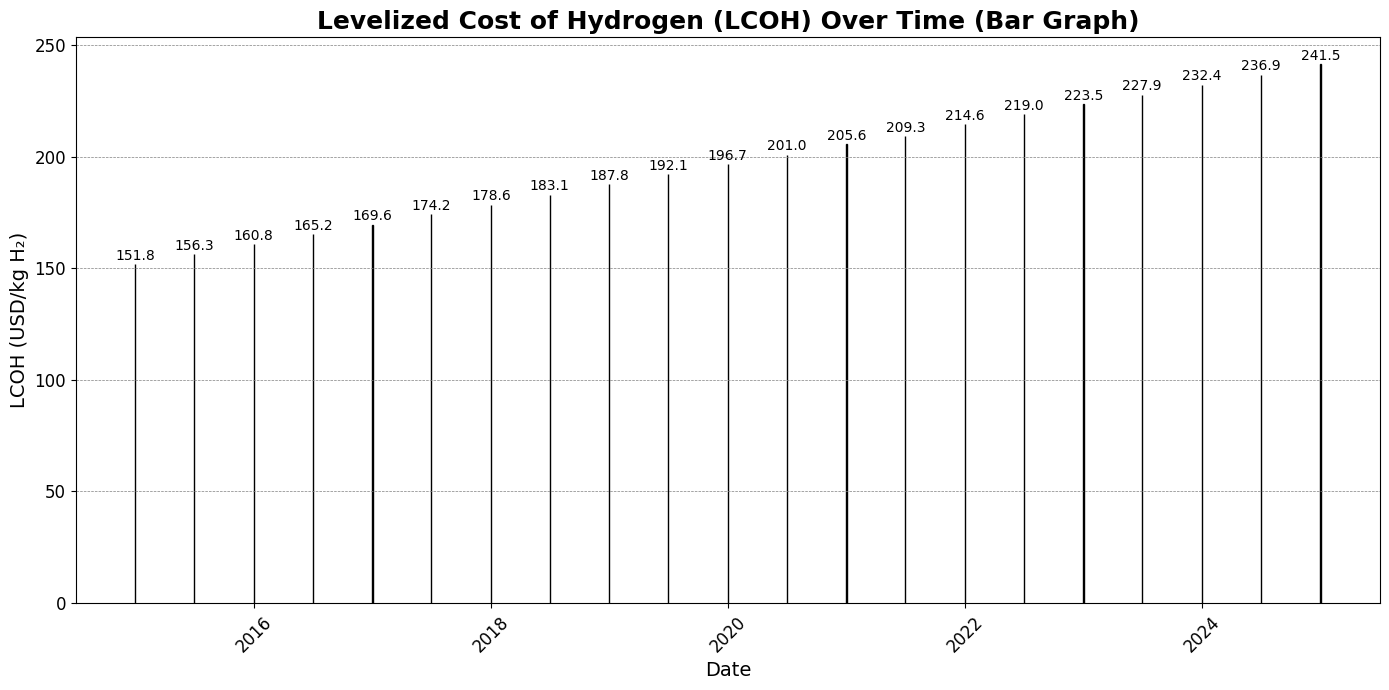

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# LCOH data
data = {
    'Date': ['1/1/2015', '7/1/2015', '1/1/2016', '7/1/2016', '1/1/2017', '7/1/2017',
             '1/1/2018', '7/1/2018', '1/1/2019', '7/1/2019', '1/1/2020', '7/1/2020',
             '1/1/2021', '7/1/2021', '1/1/2022', '7/1/2022', '1/1/2023', '7/1/2023',
             '1/1/2024', '7/1/2024', '1/1/2025'],
    'LCOH (USD/kg H₂)': [151.8, 156.3, 160.8, 165.2, 169.6, 174.2, 178.6, 183.1, 187.8,
                         192.1, 196.7, 201, 205.6, 209.3, 214.6, 219, 223.5, 227.9,
                         232.4, 236.9, 241.5]
}

# Create a DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(df['Date'], df['LCOH (USD/kg H₂)'], color='skyblue', edgecolor='black')

# Customizations for presentation
plt.title('Levelized Cost of Hydrogen (LCOH) Over Time (Bar Graph)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('LCOH (USD/kg H₂)', fontsize=14)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels to each bar
for i in range(len(df)):
    plt.text(df['Date'][i], df['LCOH (USD/kg H₂)'][i] + 2,
             f"{df['LCOH (USD/kg H₂)'][i]:.1f}", ha='center', fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Save and display the plot
plt.savefig('lcoh_bar_graph.png', dpi=300)
plt.show()


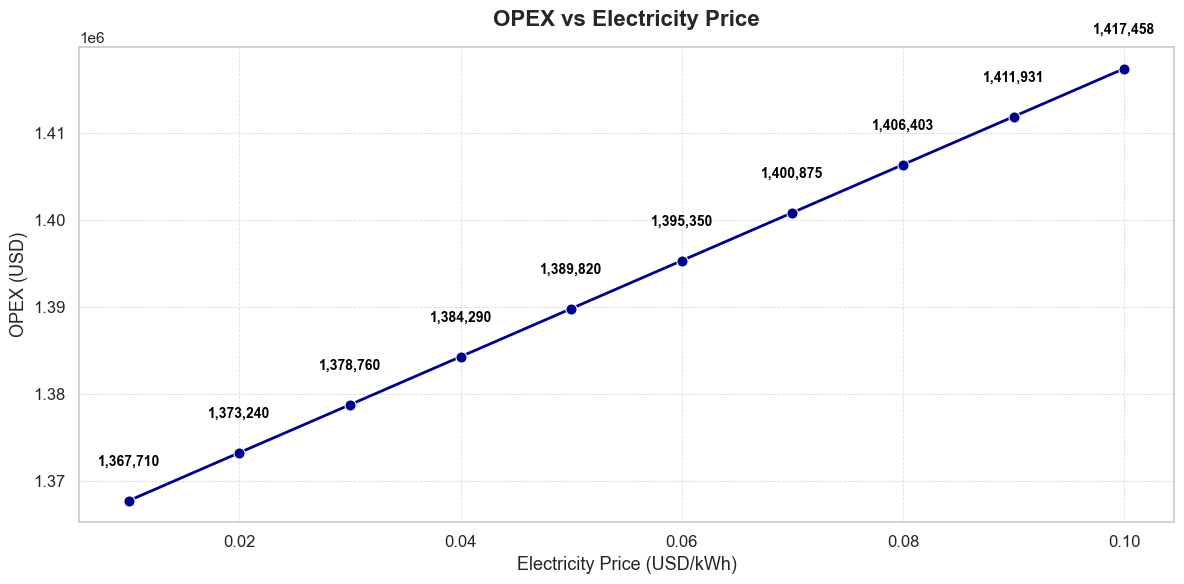

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Electricity (USD/kWh)': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    'OPEX (USD)': [1367710, 1373240, 1378760, 1384290, 1389820,
                   1395350, 1400875.333, 1406403.048, 1411930.762, 1417458.476]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Electricity (USD/kWh)', y='OPEX (USD)', data=df, marker='o', markersize=8, linewidth=2, color='darkblue')

# Customizations
plt.title('OPEX vs Electricity Price', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Electricity Price (USD/kWh)', fontsize=13)
plt.ylabel('OPEX (USD)', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)

# Add value labels
for x, y in zip(df['Electricity (USD/kWh)'], df['OPEX (USD)']):
    plt.text(x, y + 4000, f"{y:,.0f}", ha='center', fontsize=10, color='black', fontweight='bold')

# Save and Show
plt.tight_layout()
plt.savefig('opex_vs_electricity_line_graph.png', dpi=300)
plt.show()


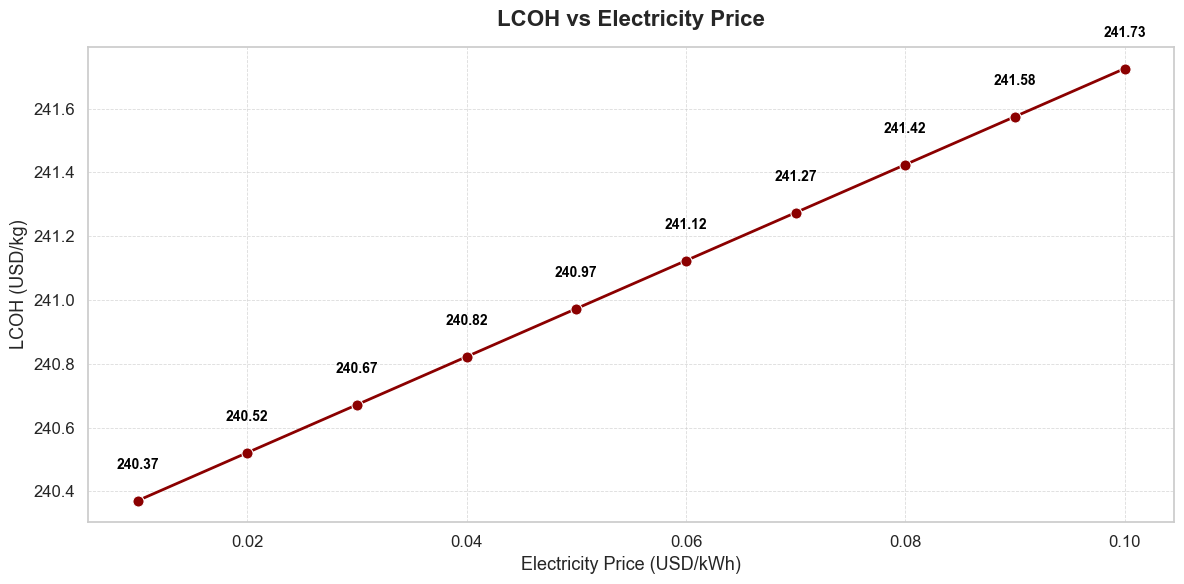

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Electricity (USD/kWh)': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    'LCOH (USD/kg)': [240.3710117, 240.5215843, 240.6718846, 240.8224571, 240.9730297,
                      241.1236023, 241.2740478, 241.4245582, 241.5750685, 241.7255788]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Electricity (USD/kWh)', y='LCOH (USD/kg)', data=df, marker='o', markersize=8, linewidth=2, color='darkred')

# Customizations
plt.title('LCOH vs Electricity Price', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Electricity Price (USD/kWh)', fontsize=13)
plt.ylabel('LCOH (USD/kg)', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)

# Add value labels
for x, y in zip(df['Electricity (USD/kWh)'], df['LCOH (USD/kg)']):
    plt.text(x, y + 0.1, f"{y:.2f}", ha='center', fontsize=10, color='black', fontweight='bold')

# Save and Show
plt.tight_layout()
plt.savefig('lcoh_vs_electricity_line_graph.png', dpi=300)
plt.show()
